In [1]:
#imports
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np
import math

In [2]:
# Read the Excel files into a DataFrame, skip the first row (model names)
AllData_TAU_01 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_01.xlsx')
AllData_TAU_02 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_02.xlsx')
AllData_TAU_03 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_03.xlsx')
AllData_TAU_04 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_04.xlsx')
AllData_TAU_05 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_05.xlsx')
AllData_TAU_06 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_06.xlsx')
AllData_TAU_07 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_07.xlsx')
AllData_TAU_08 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_08.xlsx')
AllData_TAU_09 = pd.read_excel('../5) Analysis/RENT Selected Fetures/AllData_TAU_09.xlsx')

In [3]:
data_dict = {
    1:AllData_TAU_01, 
    2:AllData_TAU_02, 
    3:AllData_TAU_03, 
    4:AllData_TAU_04, 
    5:AllData_TAU_05, 
    6:AllData_TAU_06, 
    7:AllData_TAU_07, 
    8:AllData_TAU_08, 
    9:AllData_TAU_09
}

In [4]:
data = {'1':{}, '2':{}, '3':{}, '4':{}, '5':{}, '6':{}, '7':{}, '8':{}, '9':{}}
for j in range(1,10):
    my_dict = {'fold_1':{}, 'fold_2':{}, 'fold_3':{}, 'fold_4':{}, 'fold_5':{}, 'fold_6':{}, 'fold_7':{}}
    for i in range(1,8):
        name = data_dict[j][data_dict[j]['Fold']==i]
        my_dict[f'fold_{i}']['Clinical_Features'] = len(name[~name['Clinical_Features'].isna()])
        my_dict[f'fold_{i}']['Gene_Features'] = len(name[~name['Gene_Features'].isna()])
        my_dict[f'fold_{i}']['Abrix_Features'] = len(name[~name['Abrix_Features'].isna()])
        my_dict[f'fold_{i}']['Ve_Features'] = len(name[~name['Ve_Features'].isna()])
        my_dict[f'fold_{i}']['Ktrans_Features'] = len(name[~name['Ktrans_Features'].isna()])
        my_dict[f'fold_{i}']['CSH_Features'] = len(name[~name['CSH_Features'].isna()])
    data[f'{j}'] = my_dict

print(data)

{'1': {'fold_1': {'Clinical_Features': 7, 'Gene_Features': 22, 'Abrix_Features': 4, 'Ve_Features': 5, 'Ktrans_Features': 4, 'CSH_Features': 4}, 'fold_2': {'Clinical_Features': 7, 'Gene_Features': 25, 'Abrix_Features': 6, 'Ve_Features': 6, 'Ktrans_Features': 3, 'CSH_Features': 6}, 'fold_3': {'Clinical_Features': 9, 'Gene_Features': 21, 'Abrix_Features': 6, 'Ve_Features': 6, 'Ktrans_Features': 4, 'CSH_Features': 6}, 'fold_4': {'Clinical_Features': 7, 'Gene_Features': 23, 'Abrix_Features': 7, 'Ve_Features': 7, 'Ktrans_Features': 3, 'CSH_Features': 6}, 'fold_5': {'Clinical_Features': 9, 'Gene_Features': 19, 'Abrix_Features': 5, 'Ve_Features': 6, 'Ktrans_Features': 3, 'CSH_Features': 6}, 'fold_6': {'Clinical_Features': 10, 'Gene_Features': 20, 'Abrix_Features': 6, 'Ve_Features': 6, 'Ktrans_Features': 1, 'CSH_Features': 5}, 'fold_7': {'Clinical_Features': 8, 'Gene_Features': 20, 'Abrix_Features': 6, 'Ve_Features': 6, 'Ktrans_Features': 4, 'CSH_Features': 6}}, '2': {'fold_1': {'Clinical_Featu

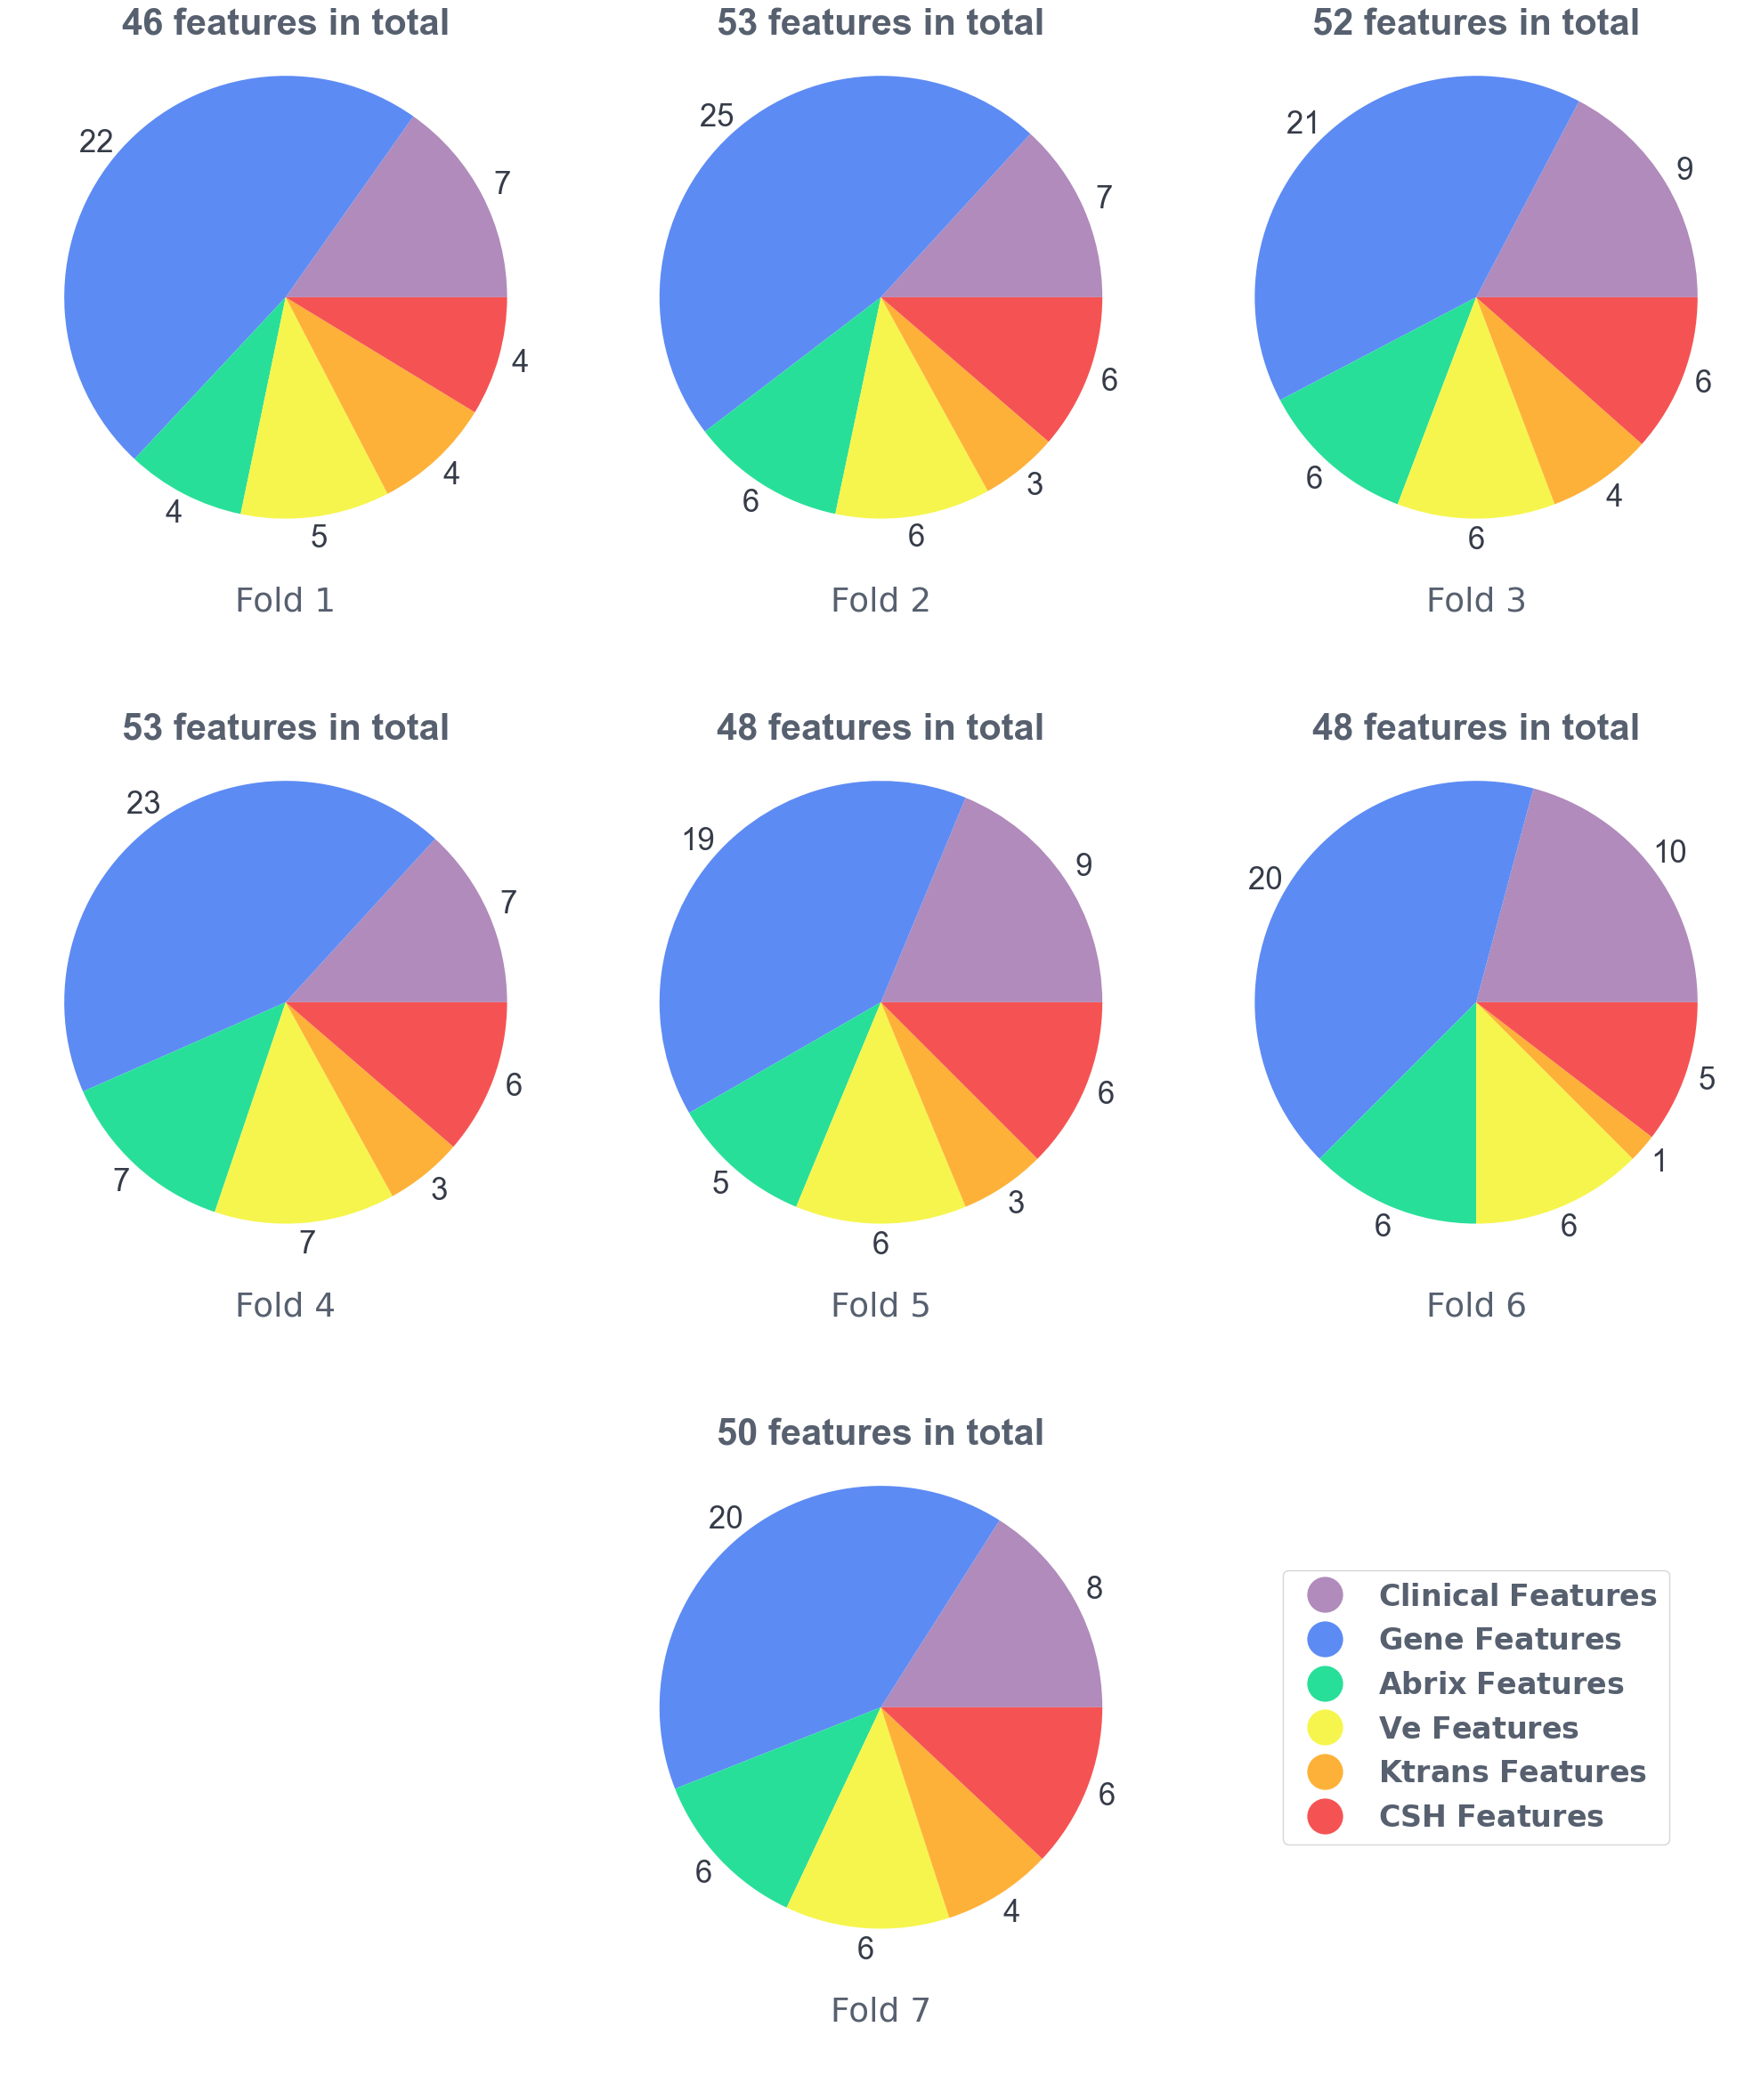

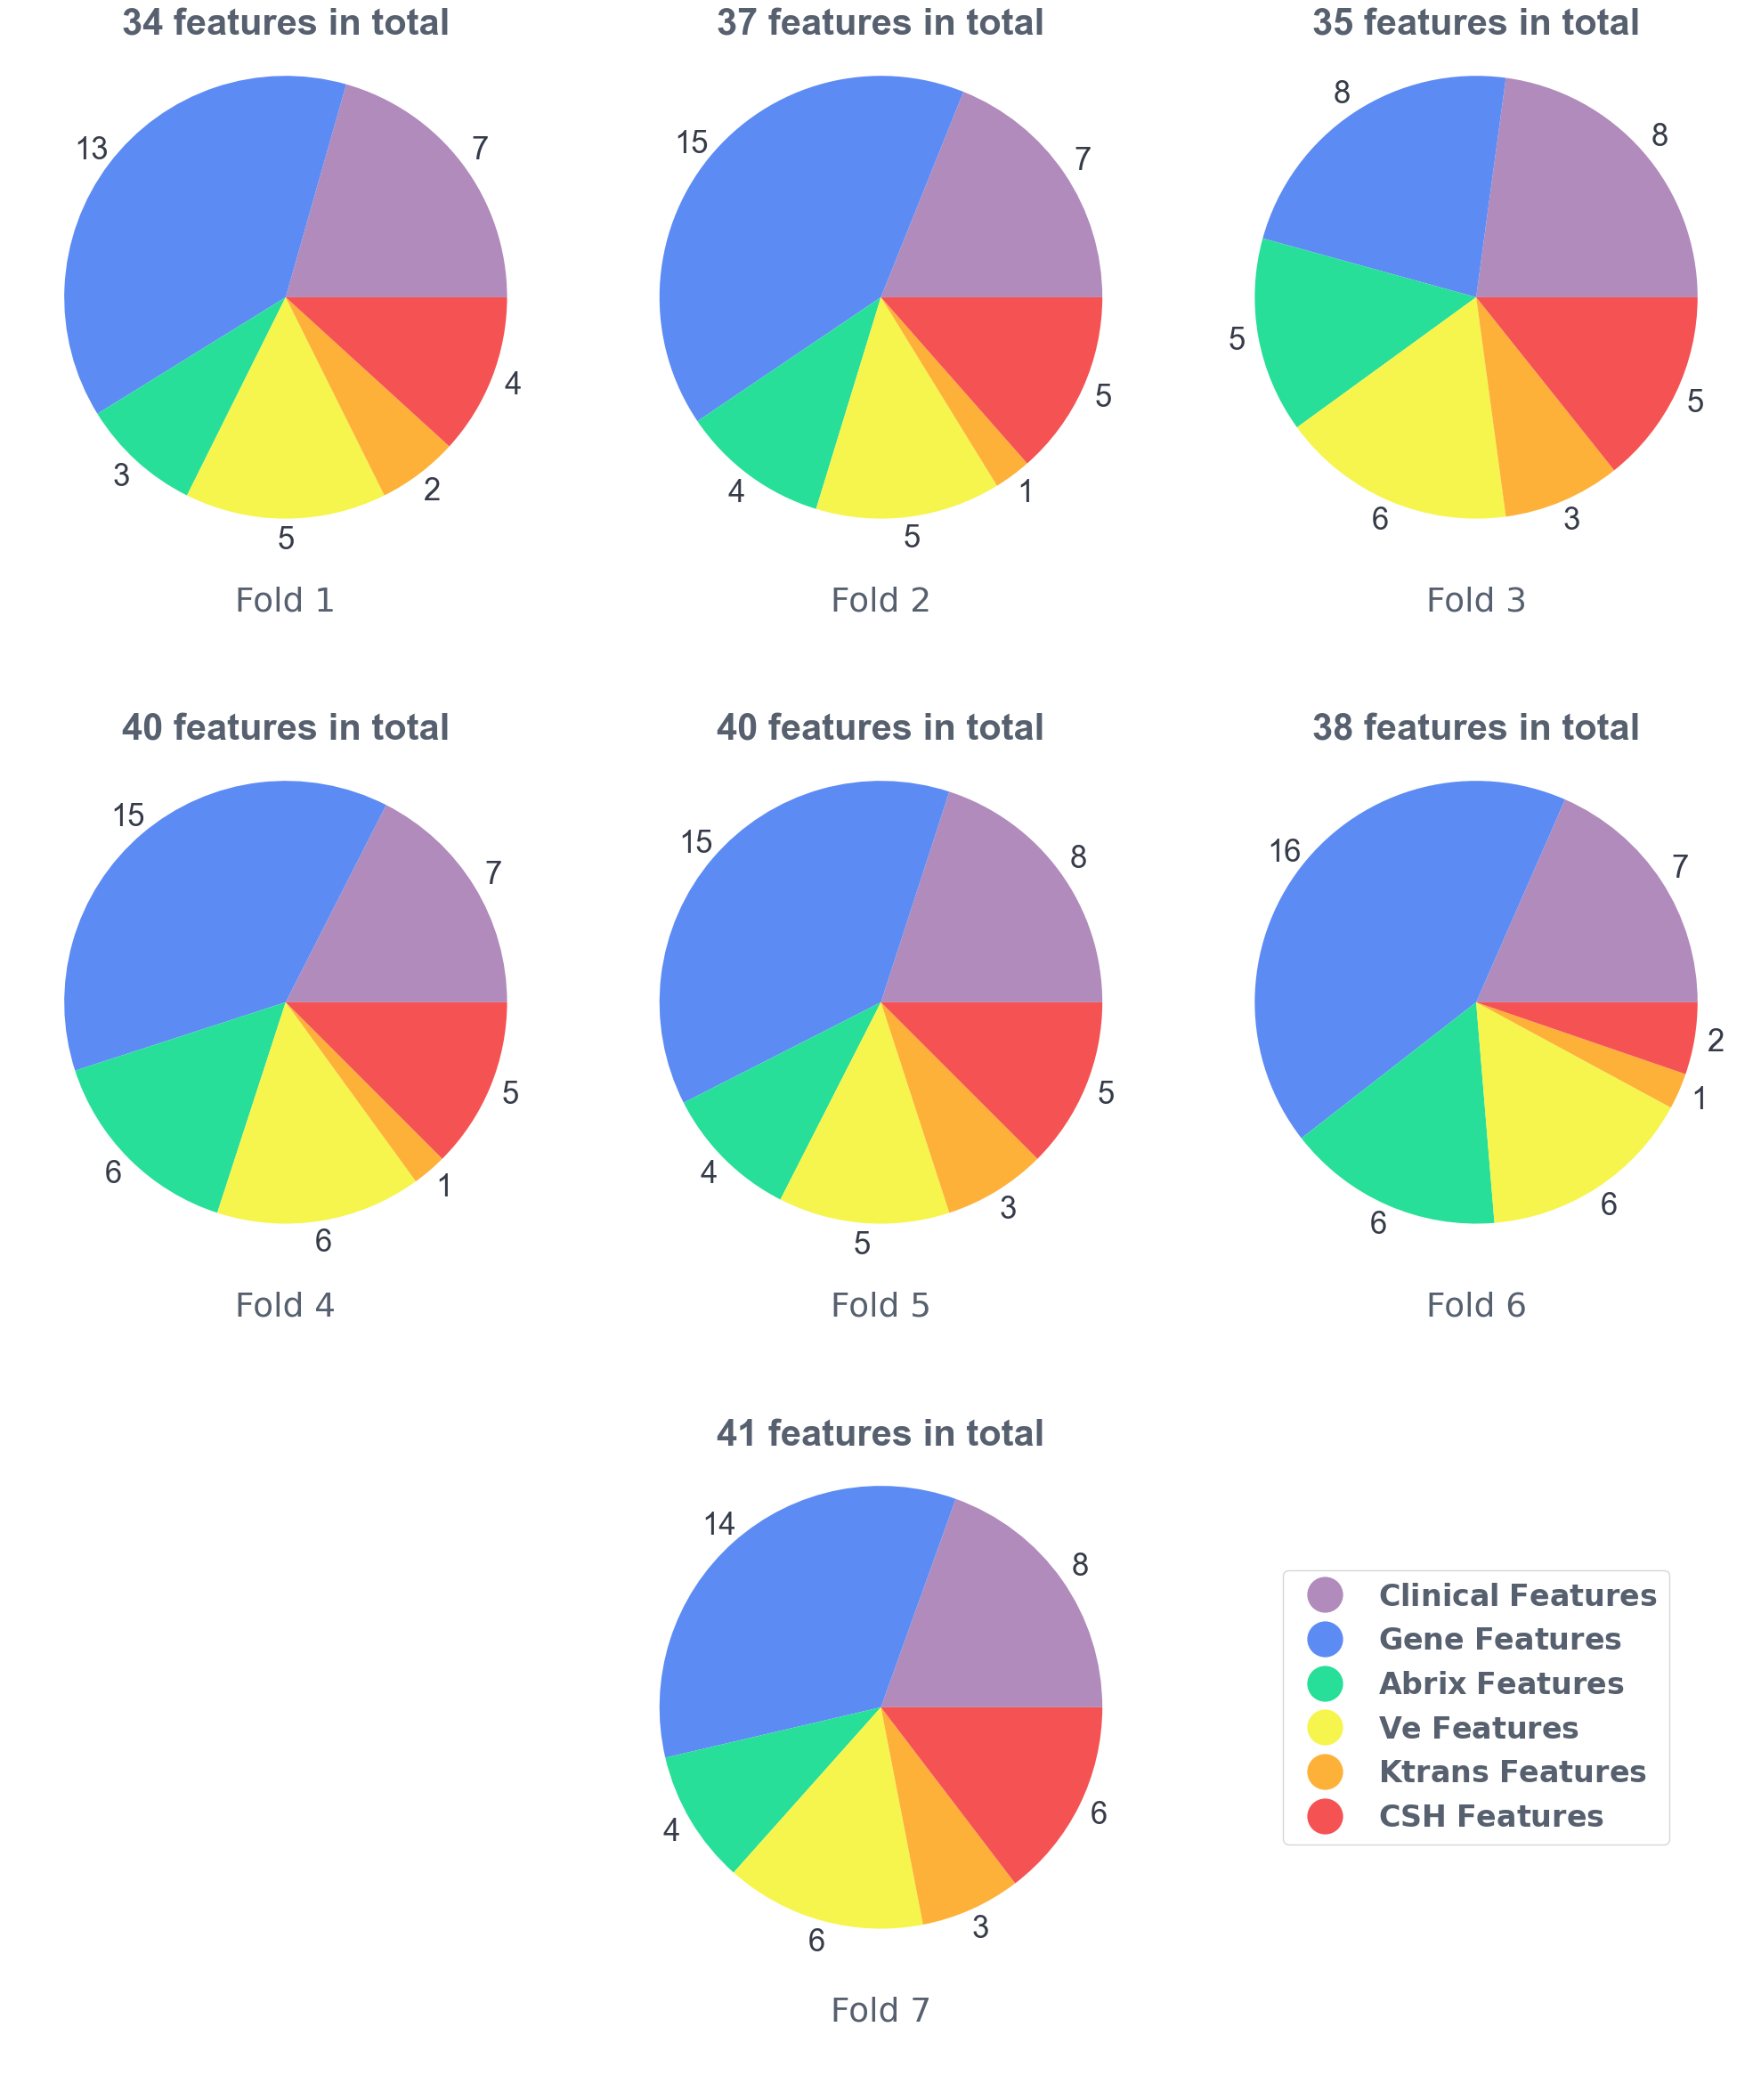

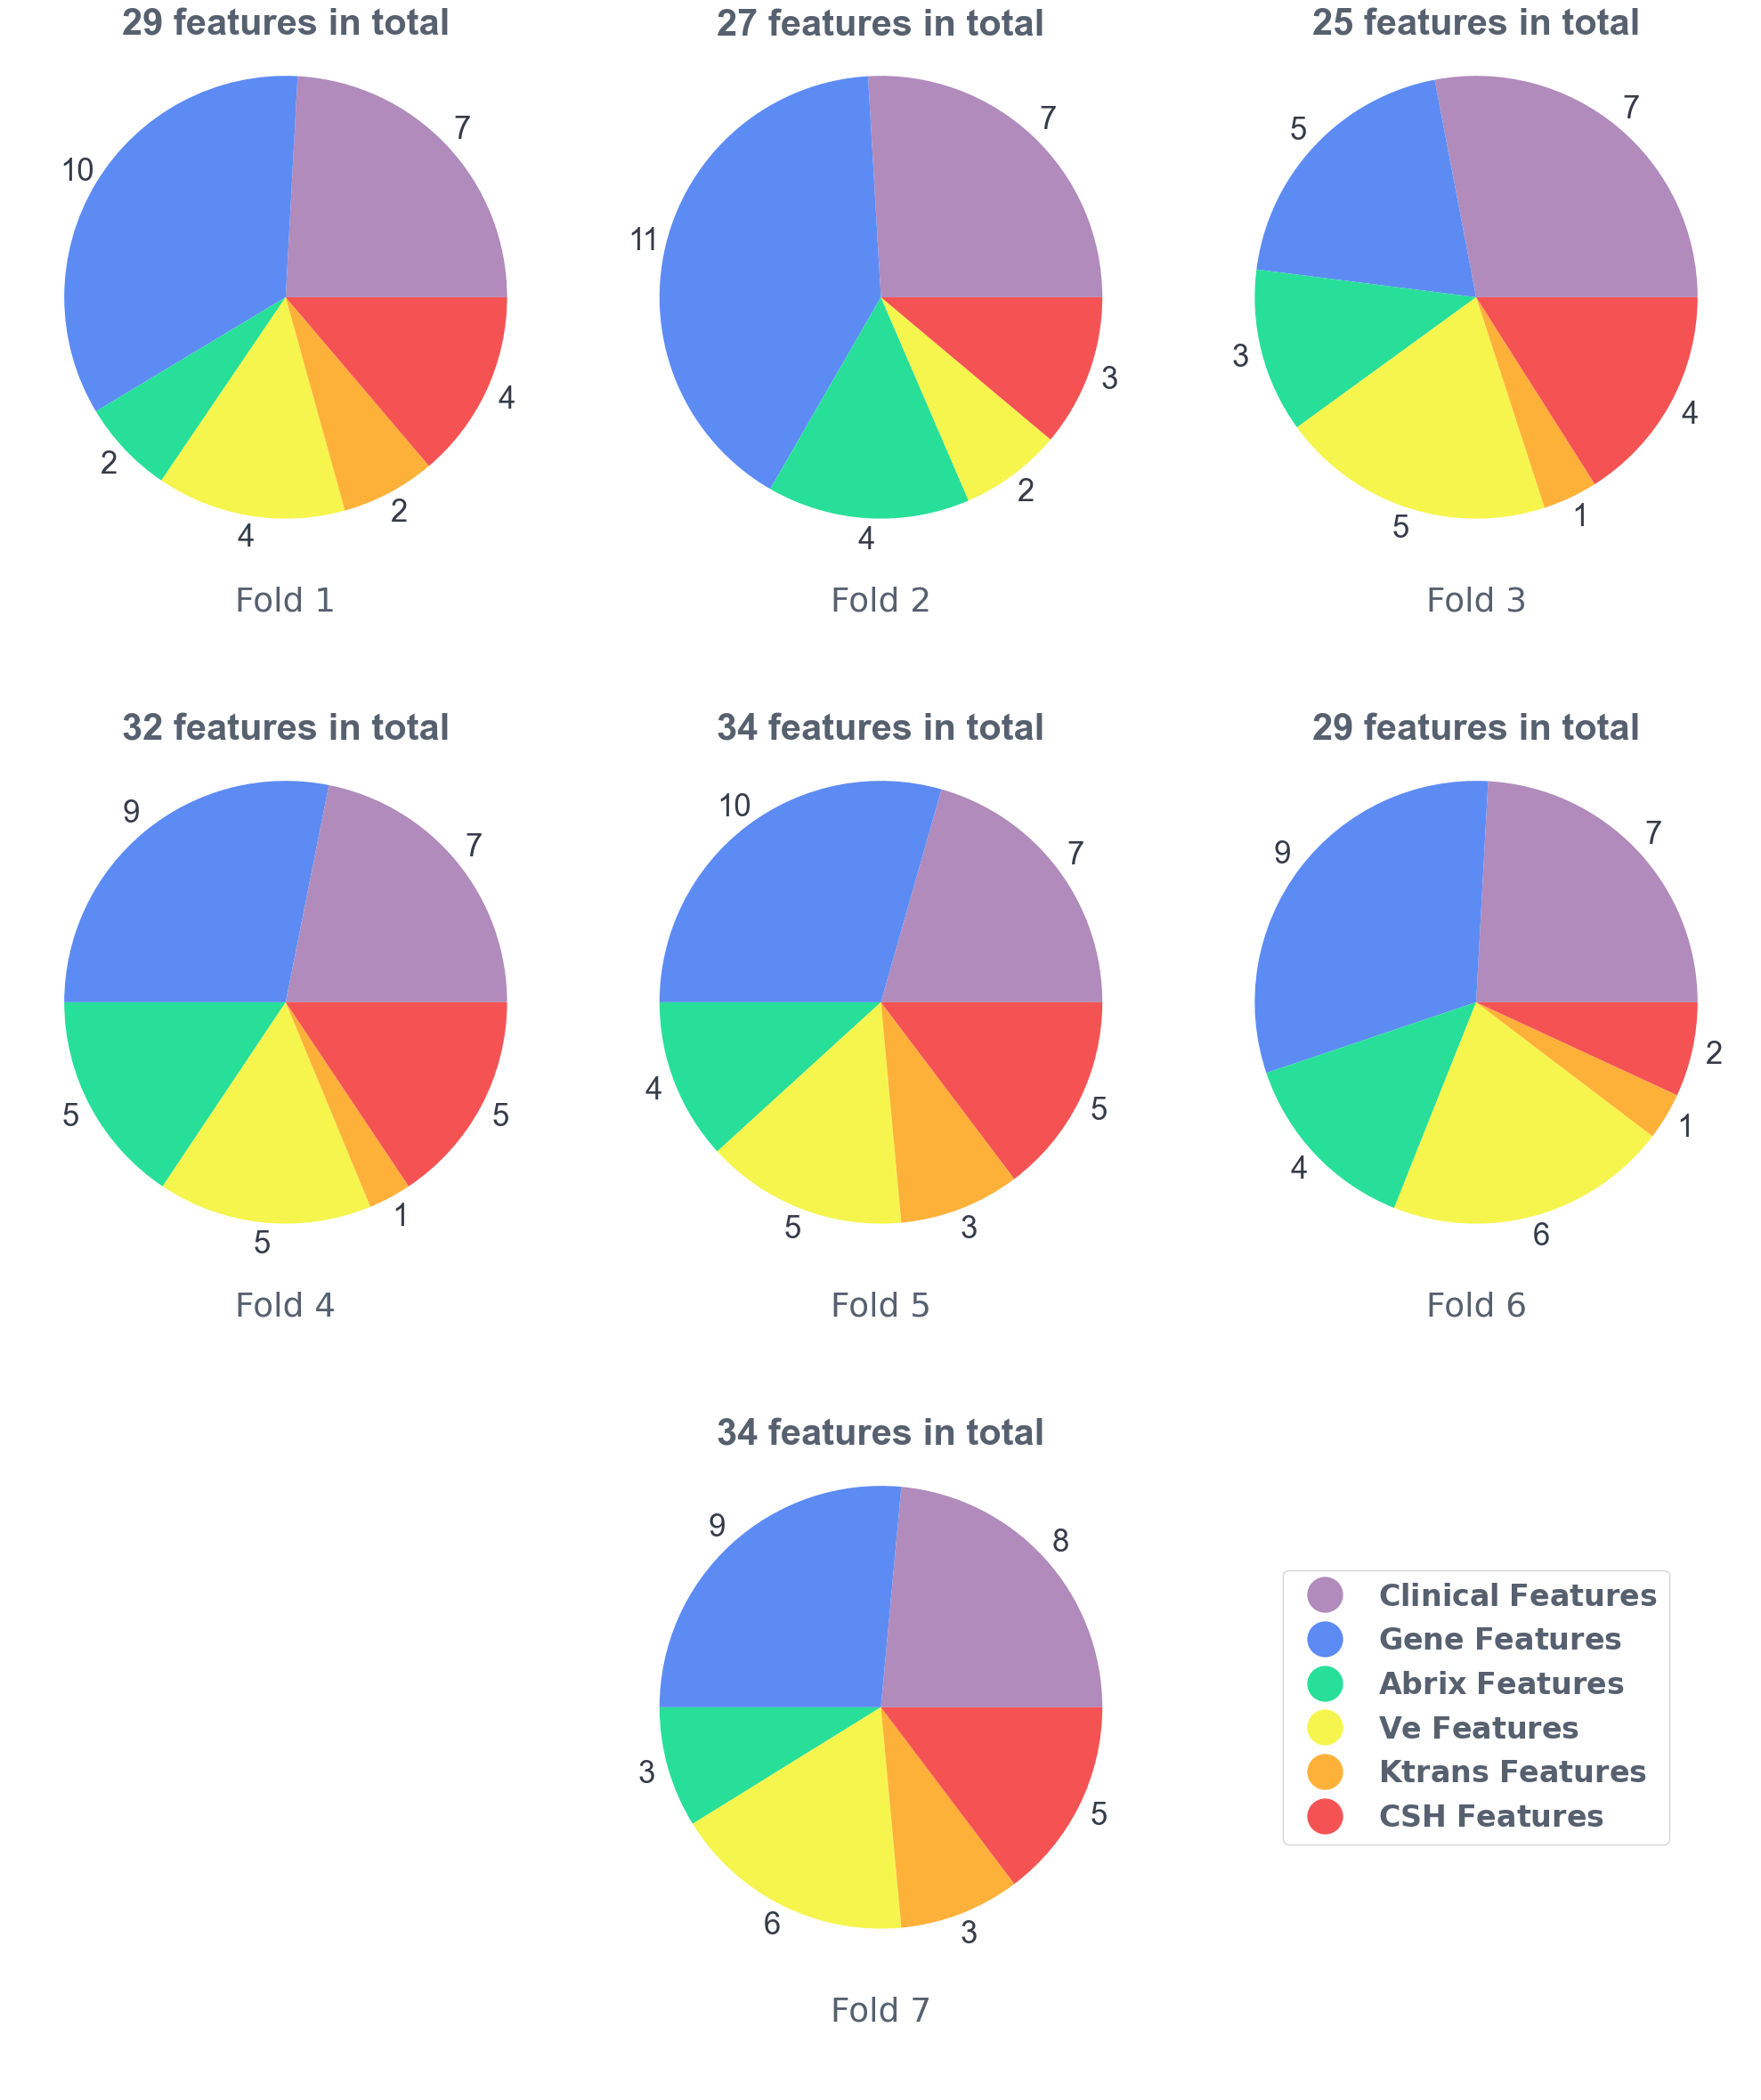

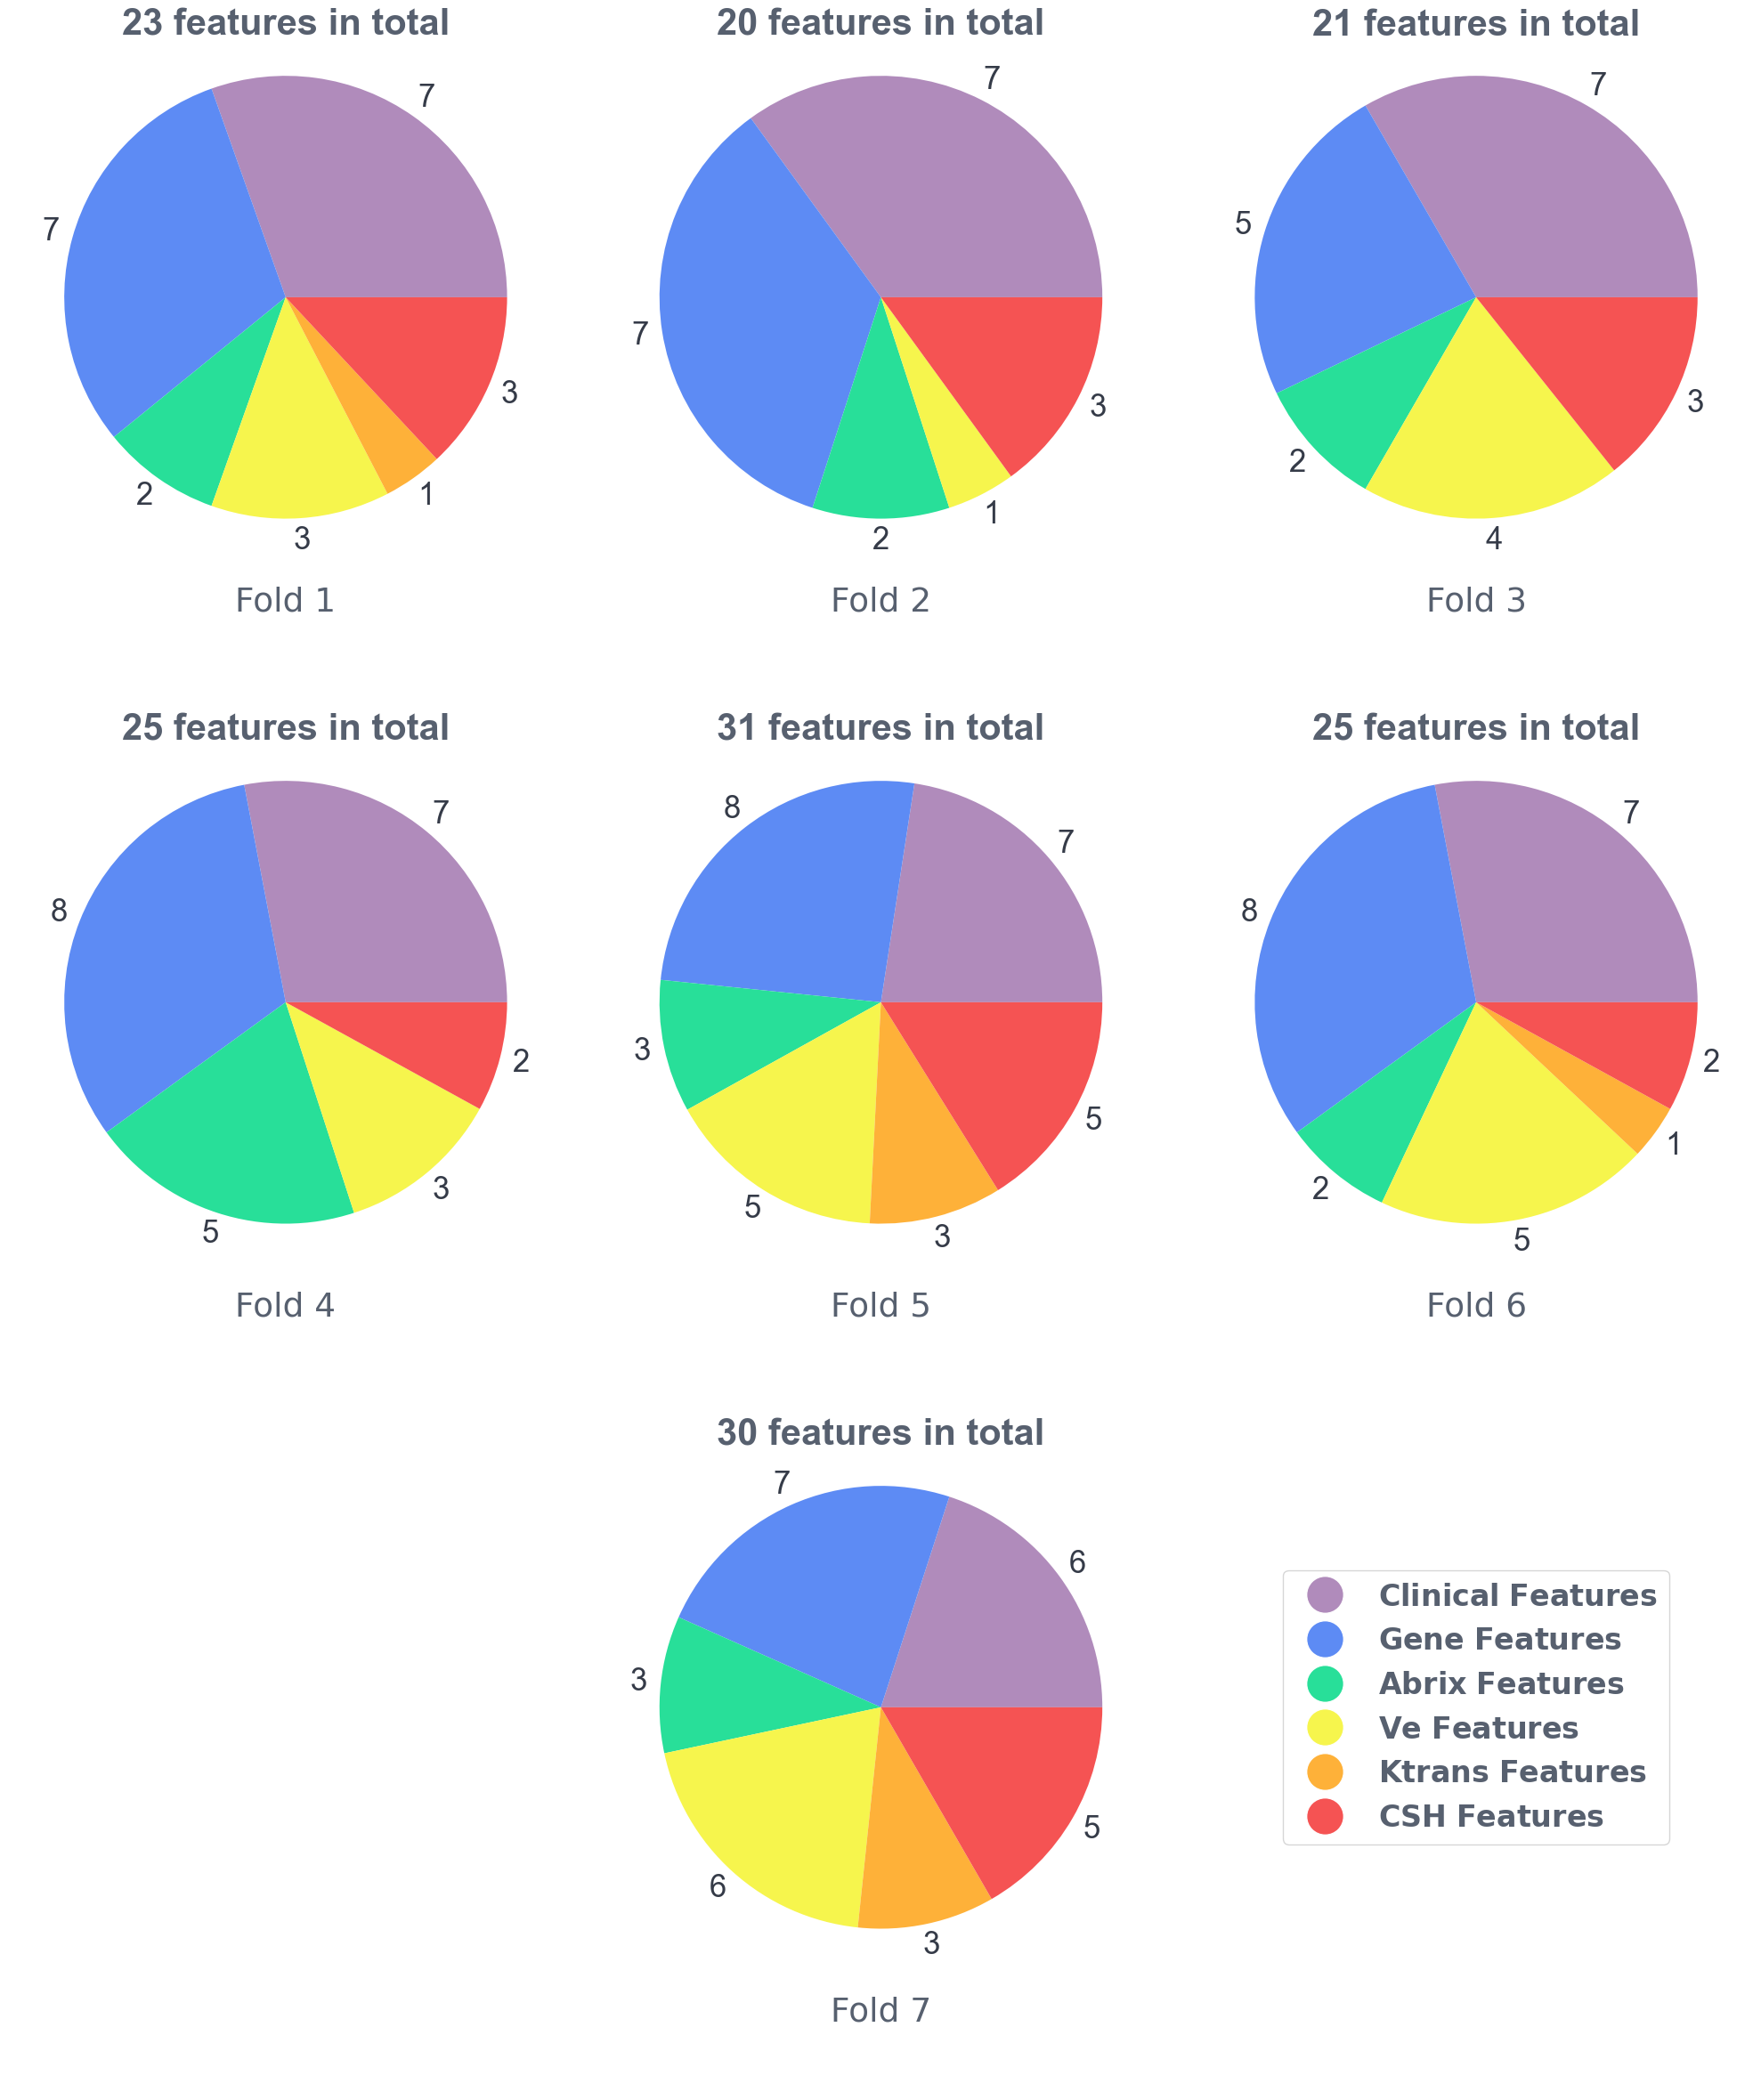

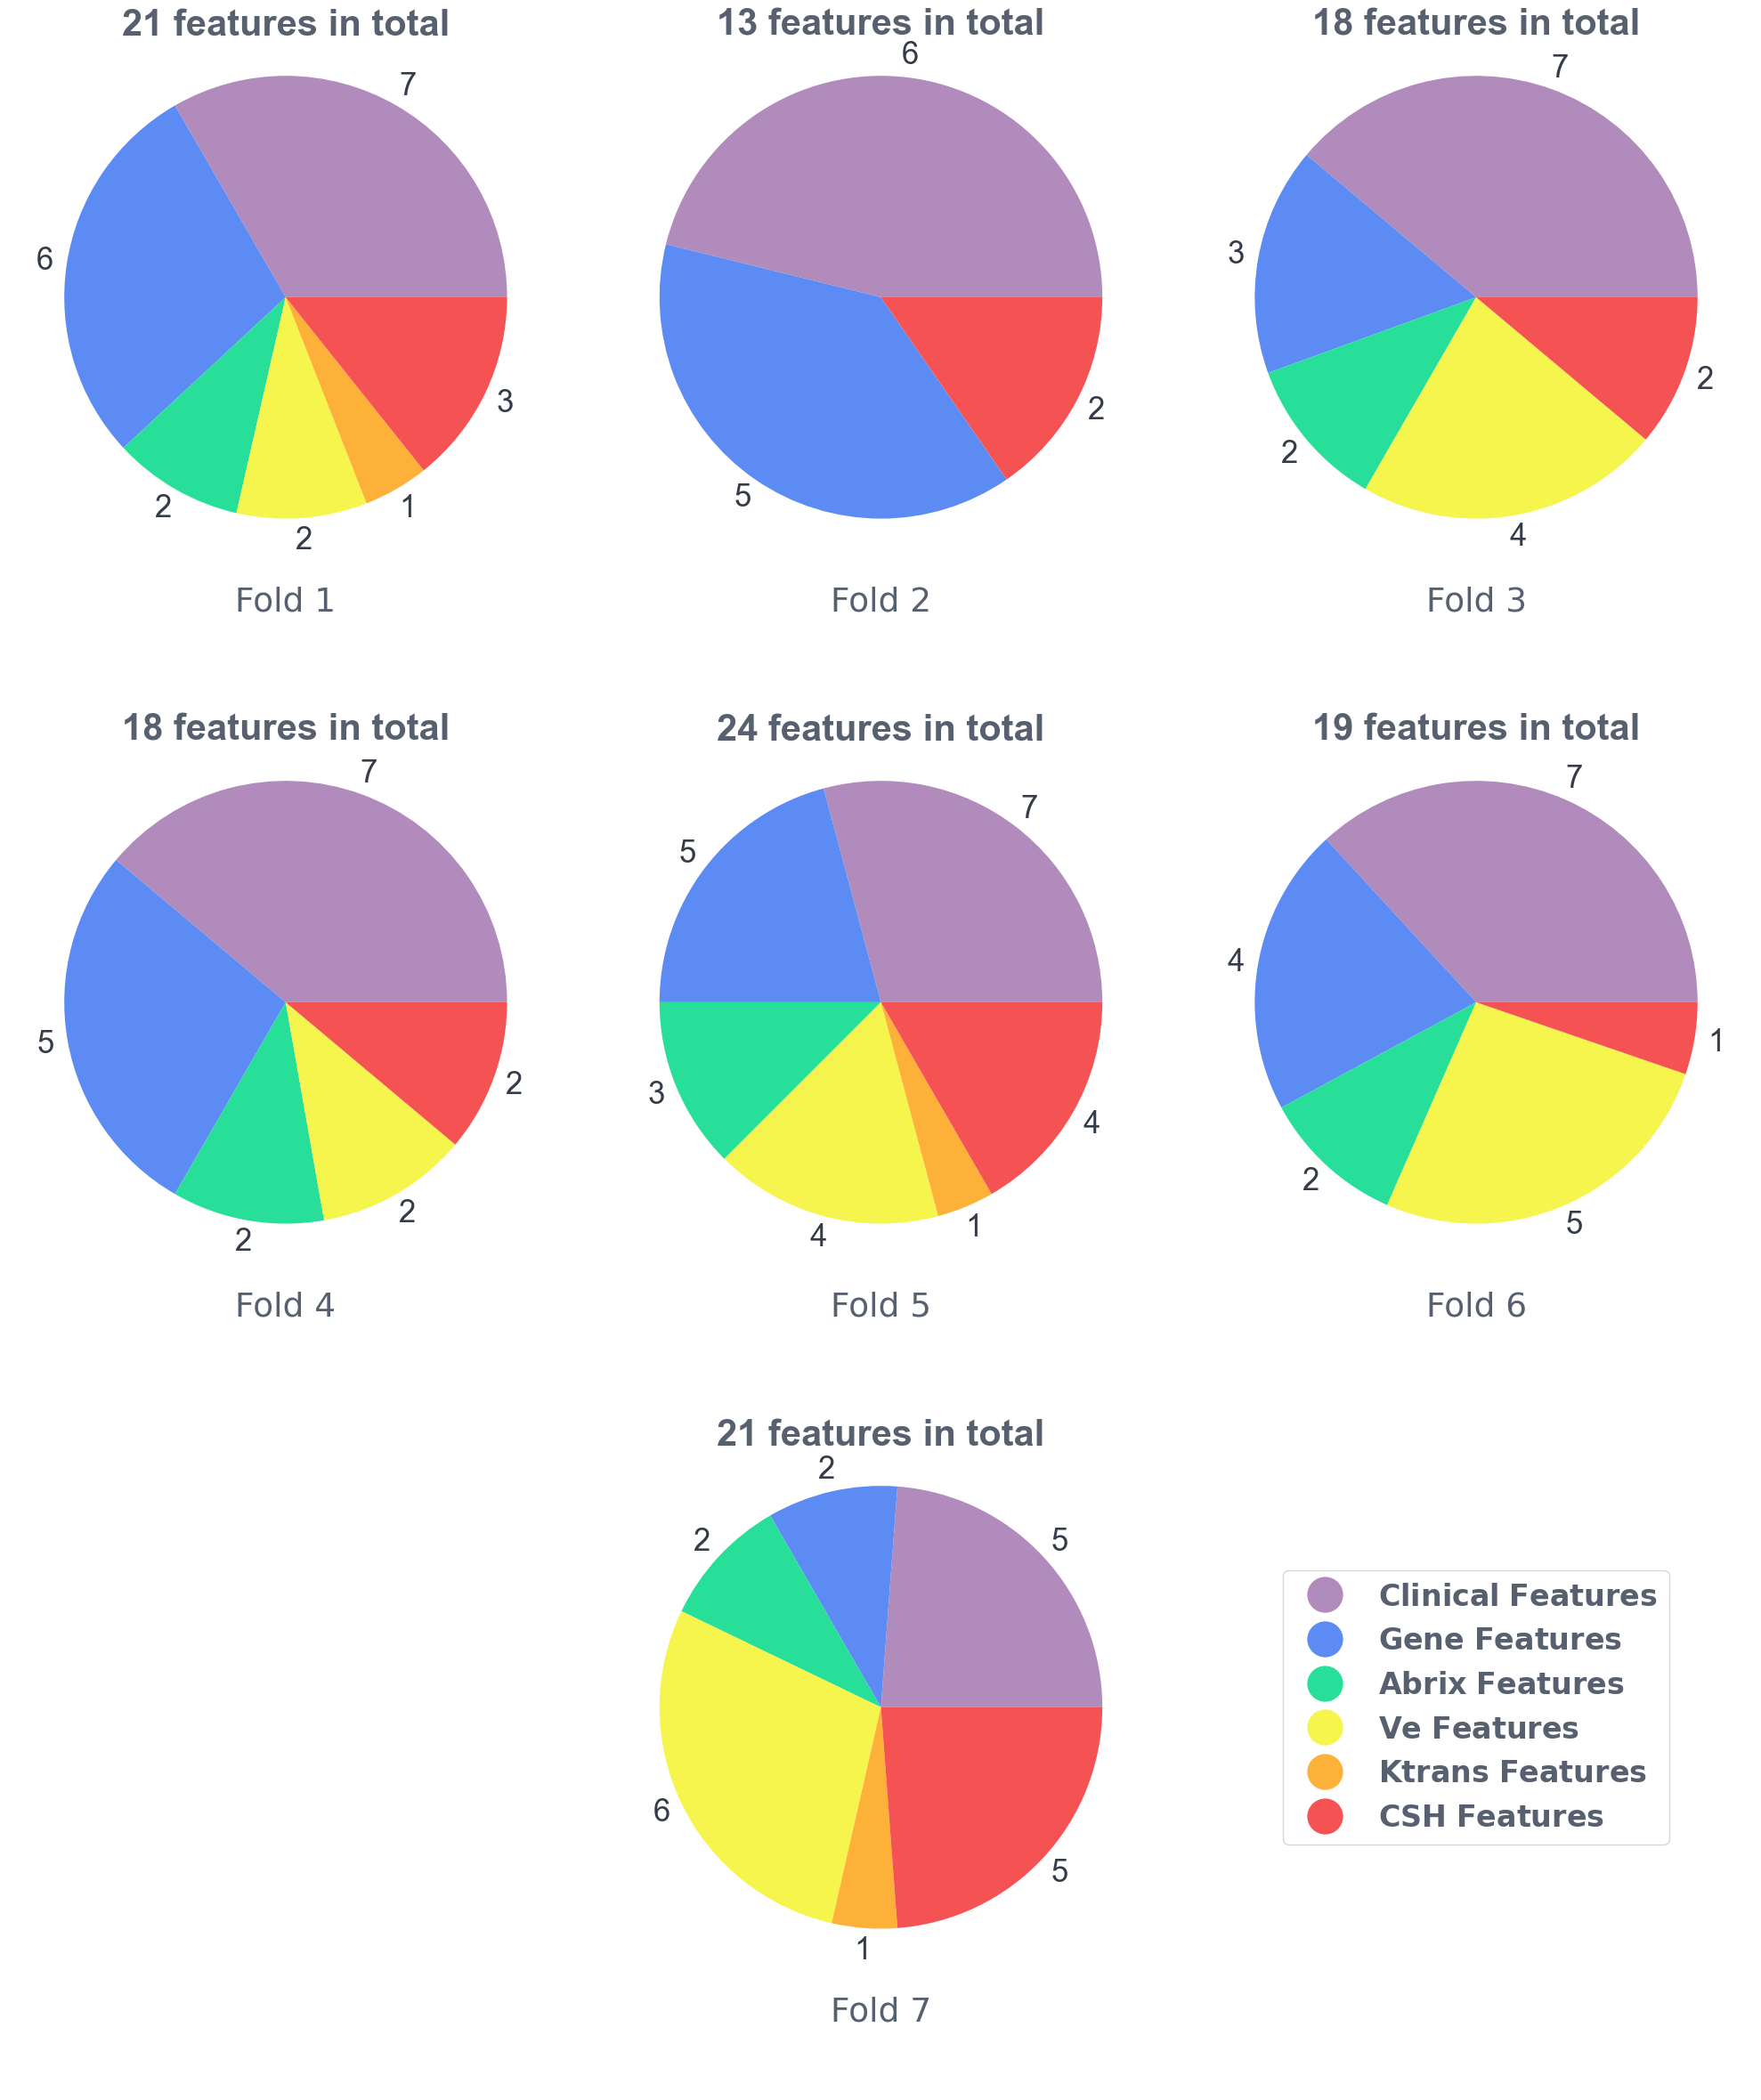

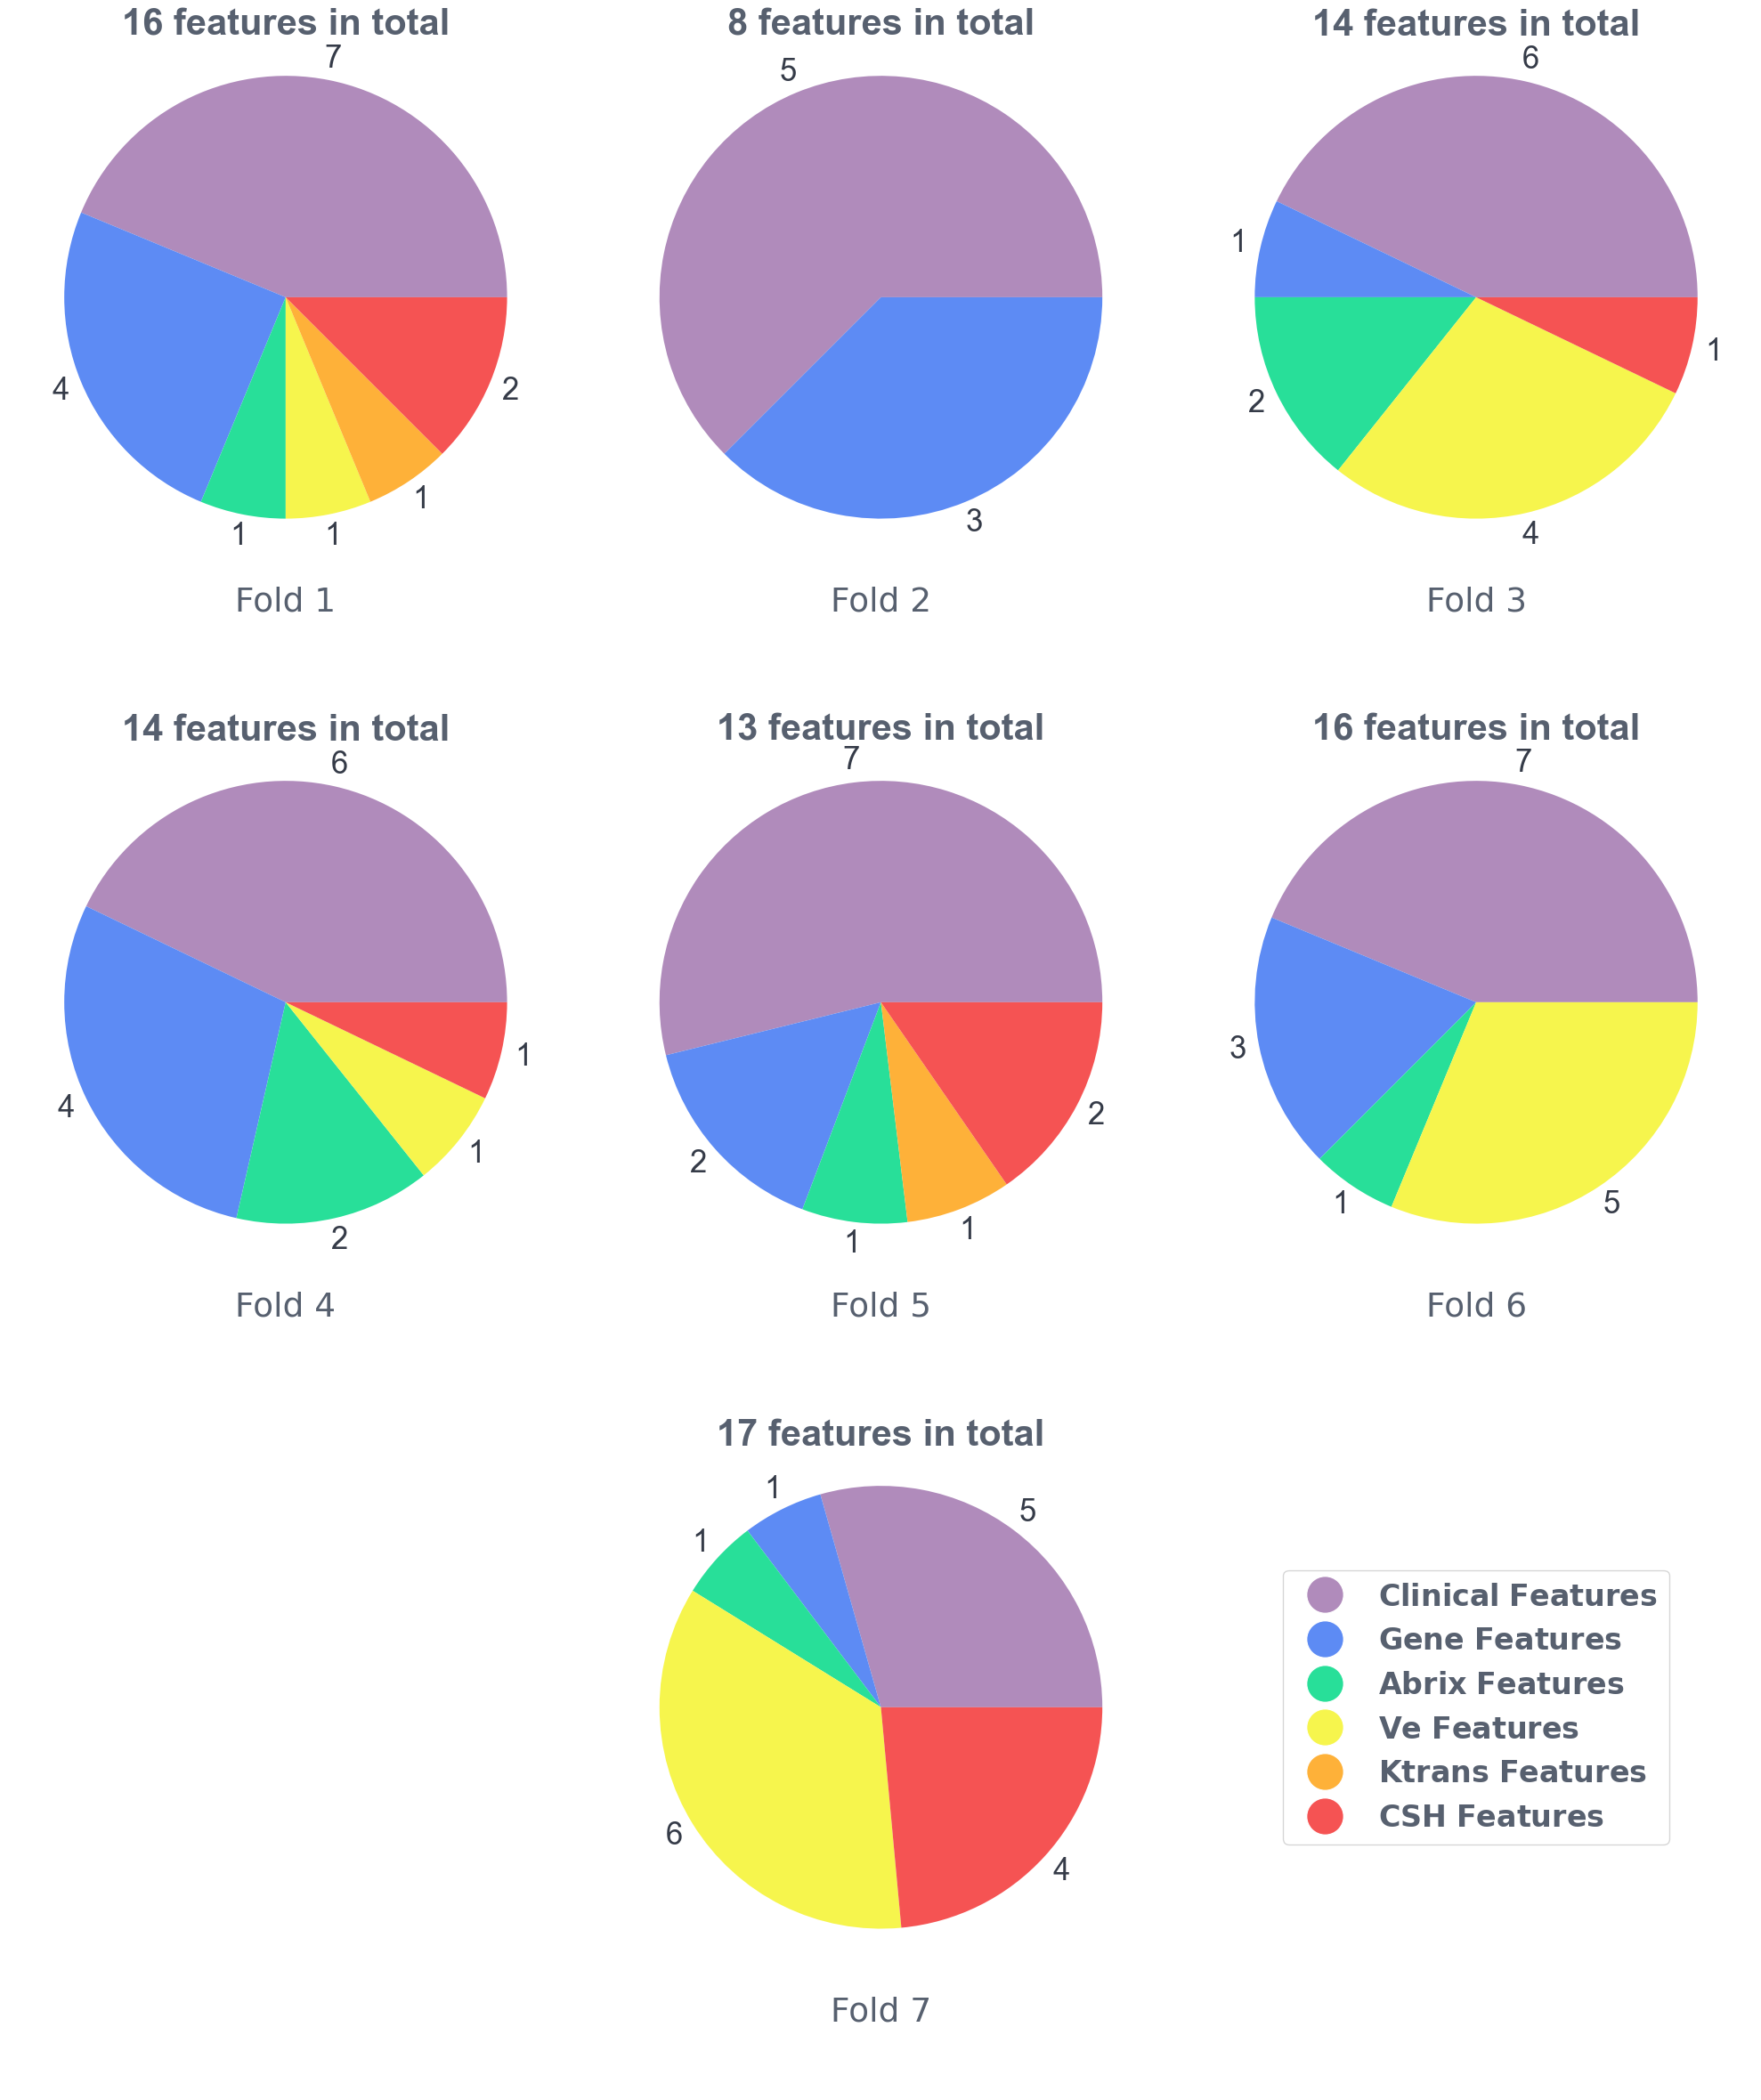

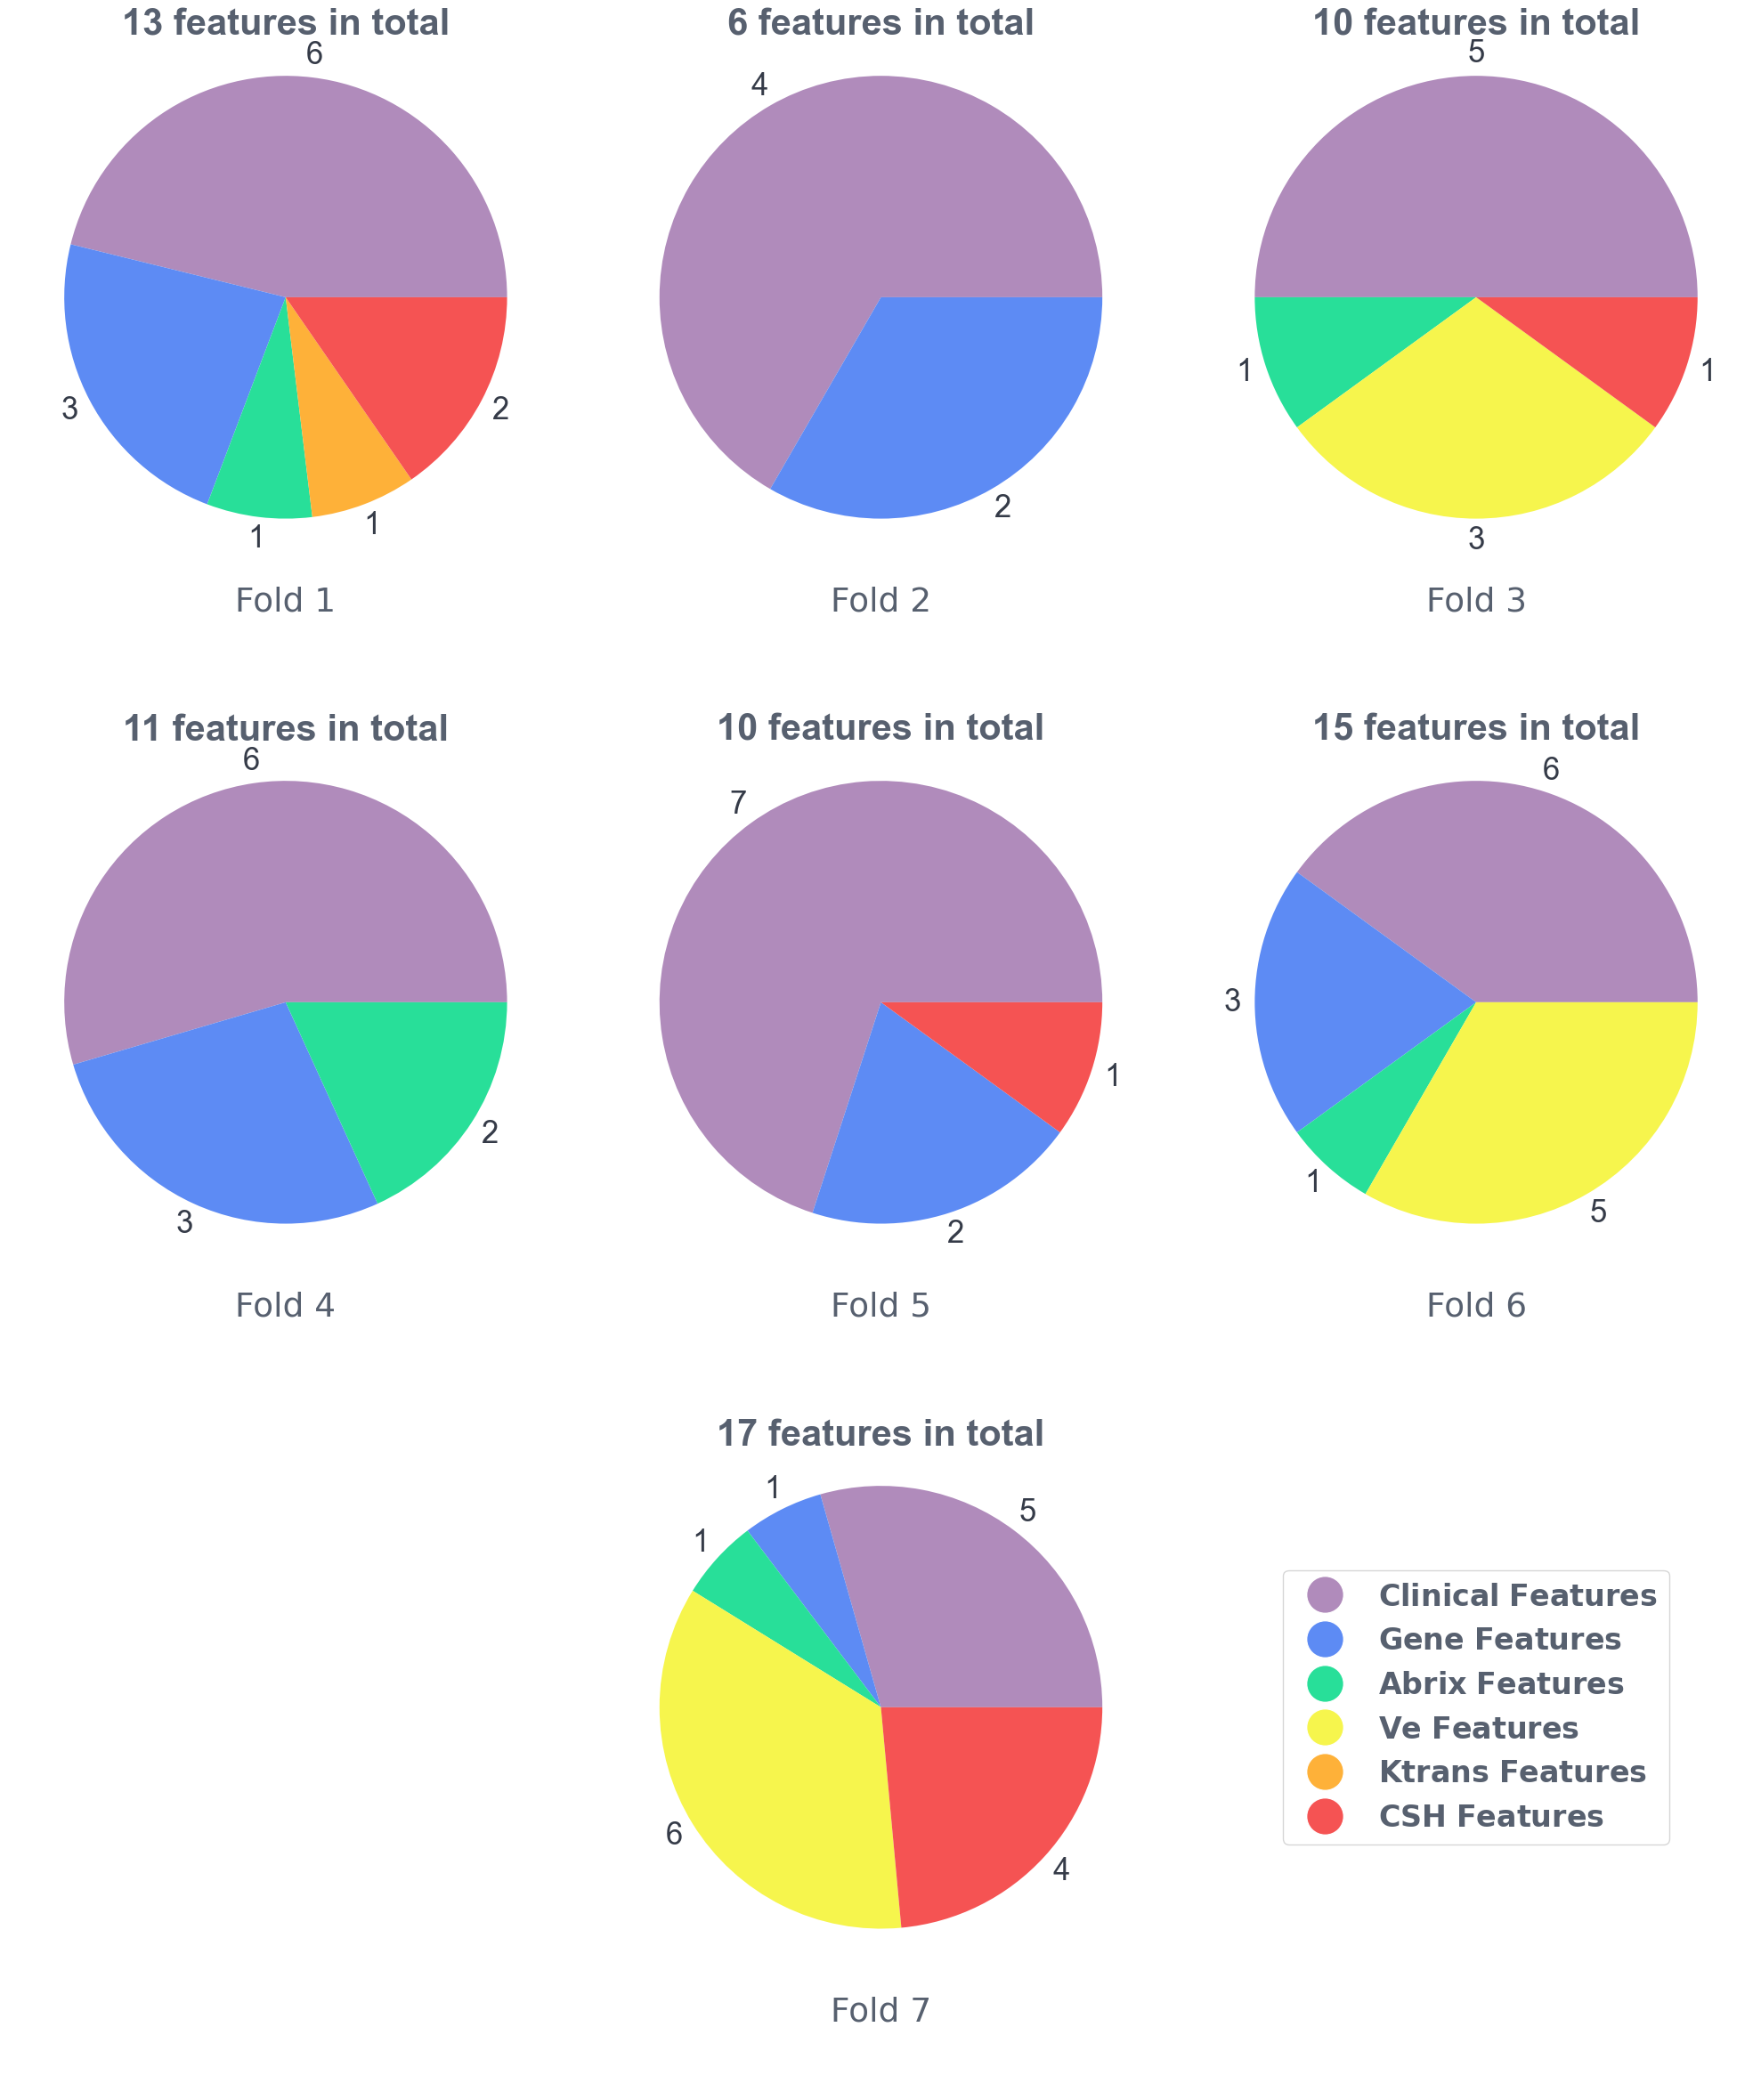

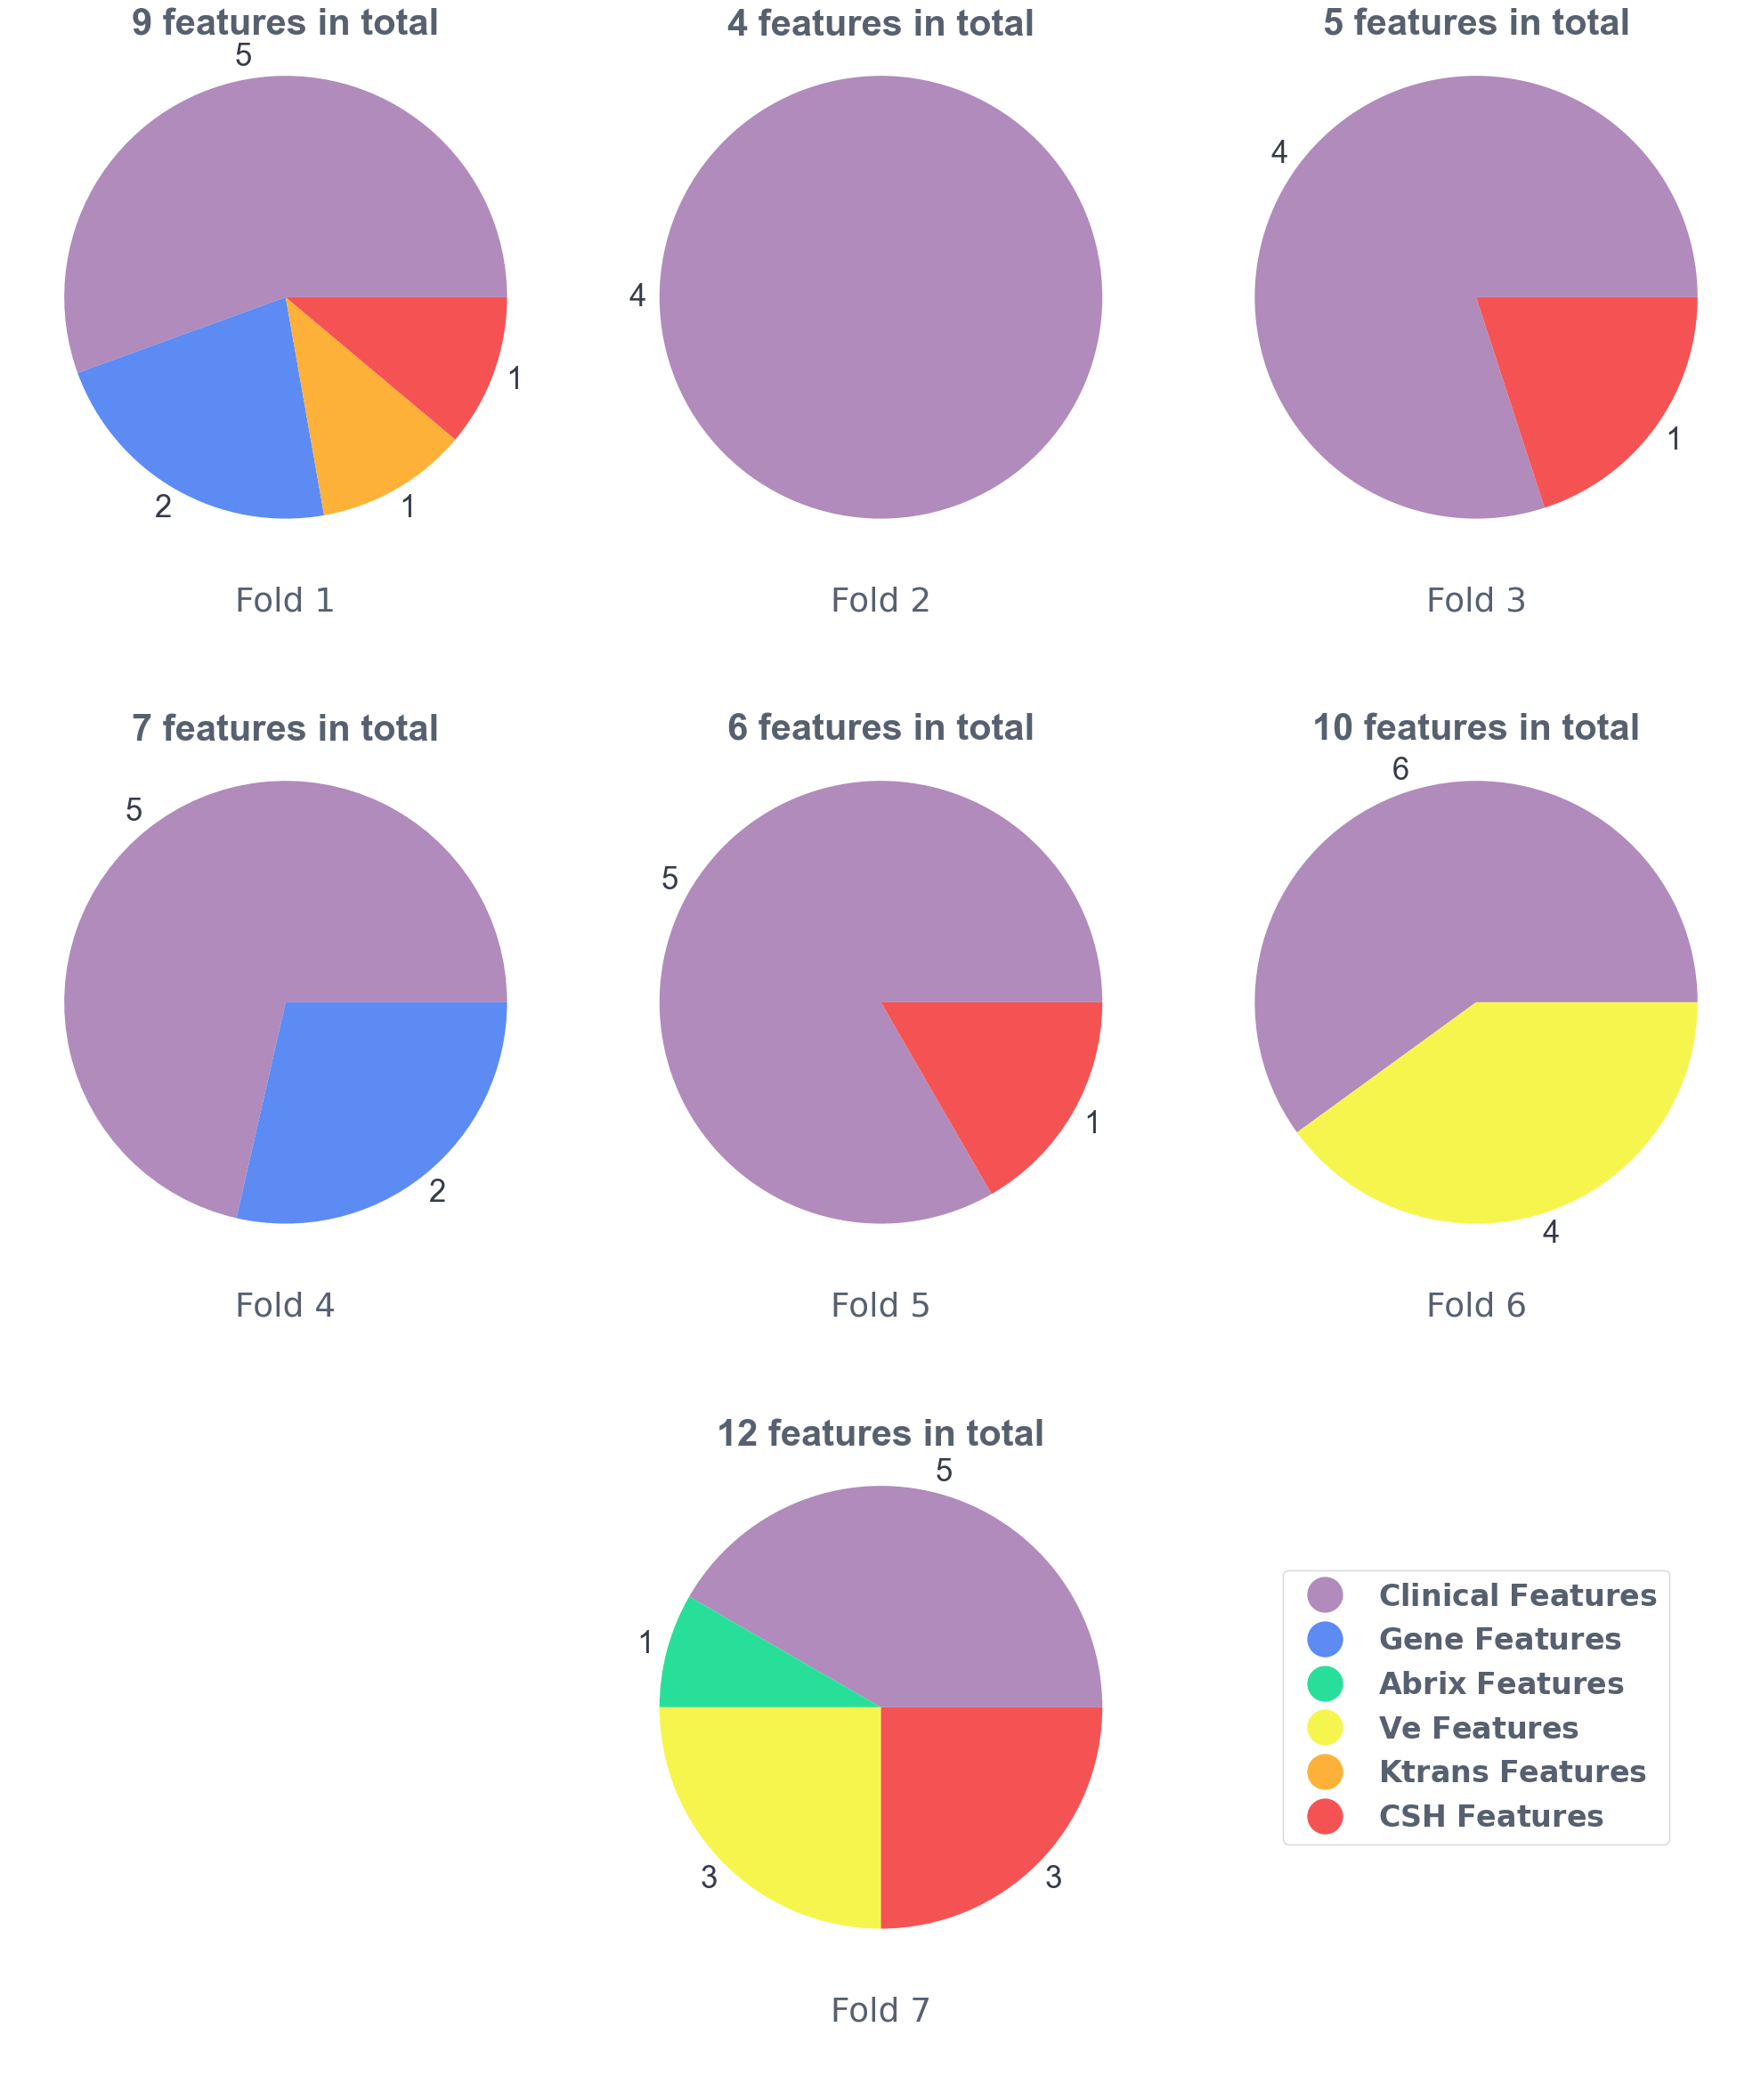

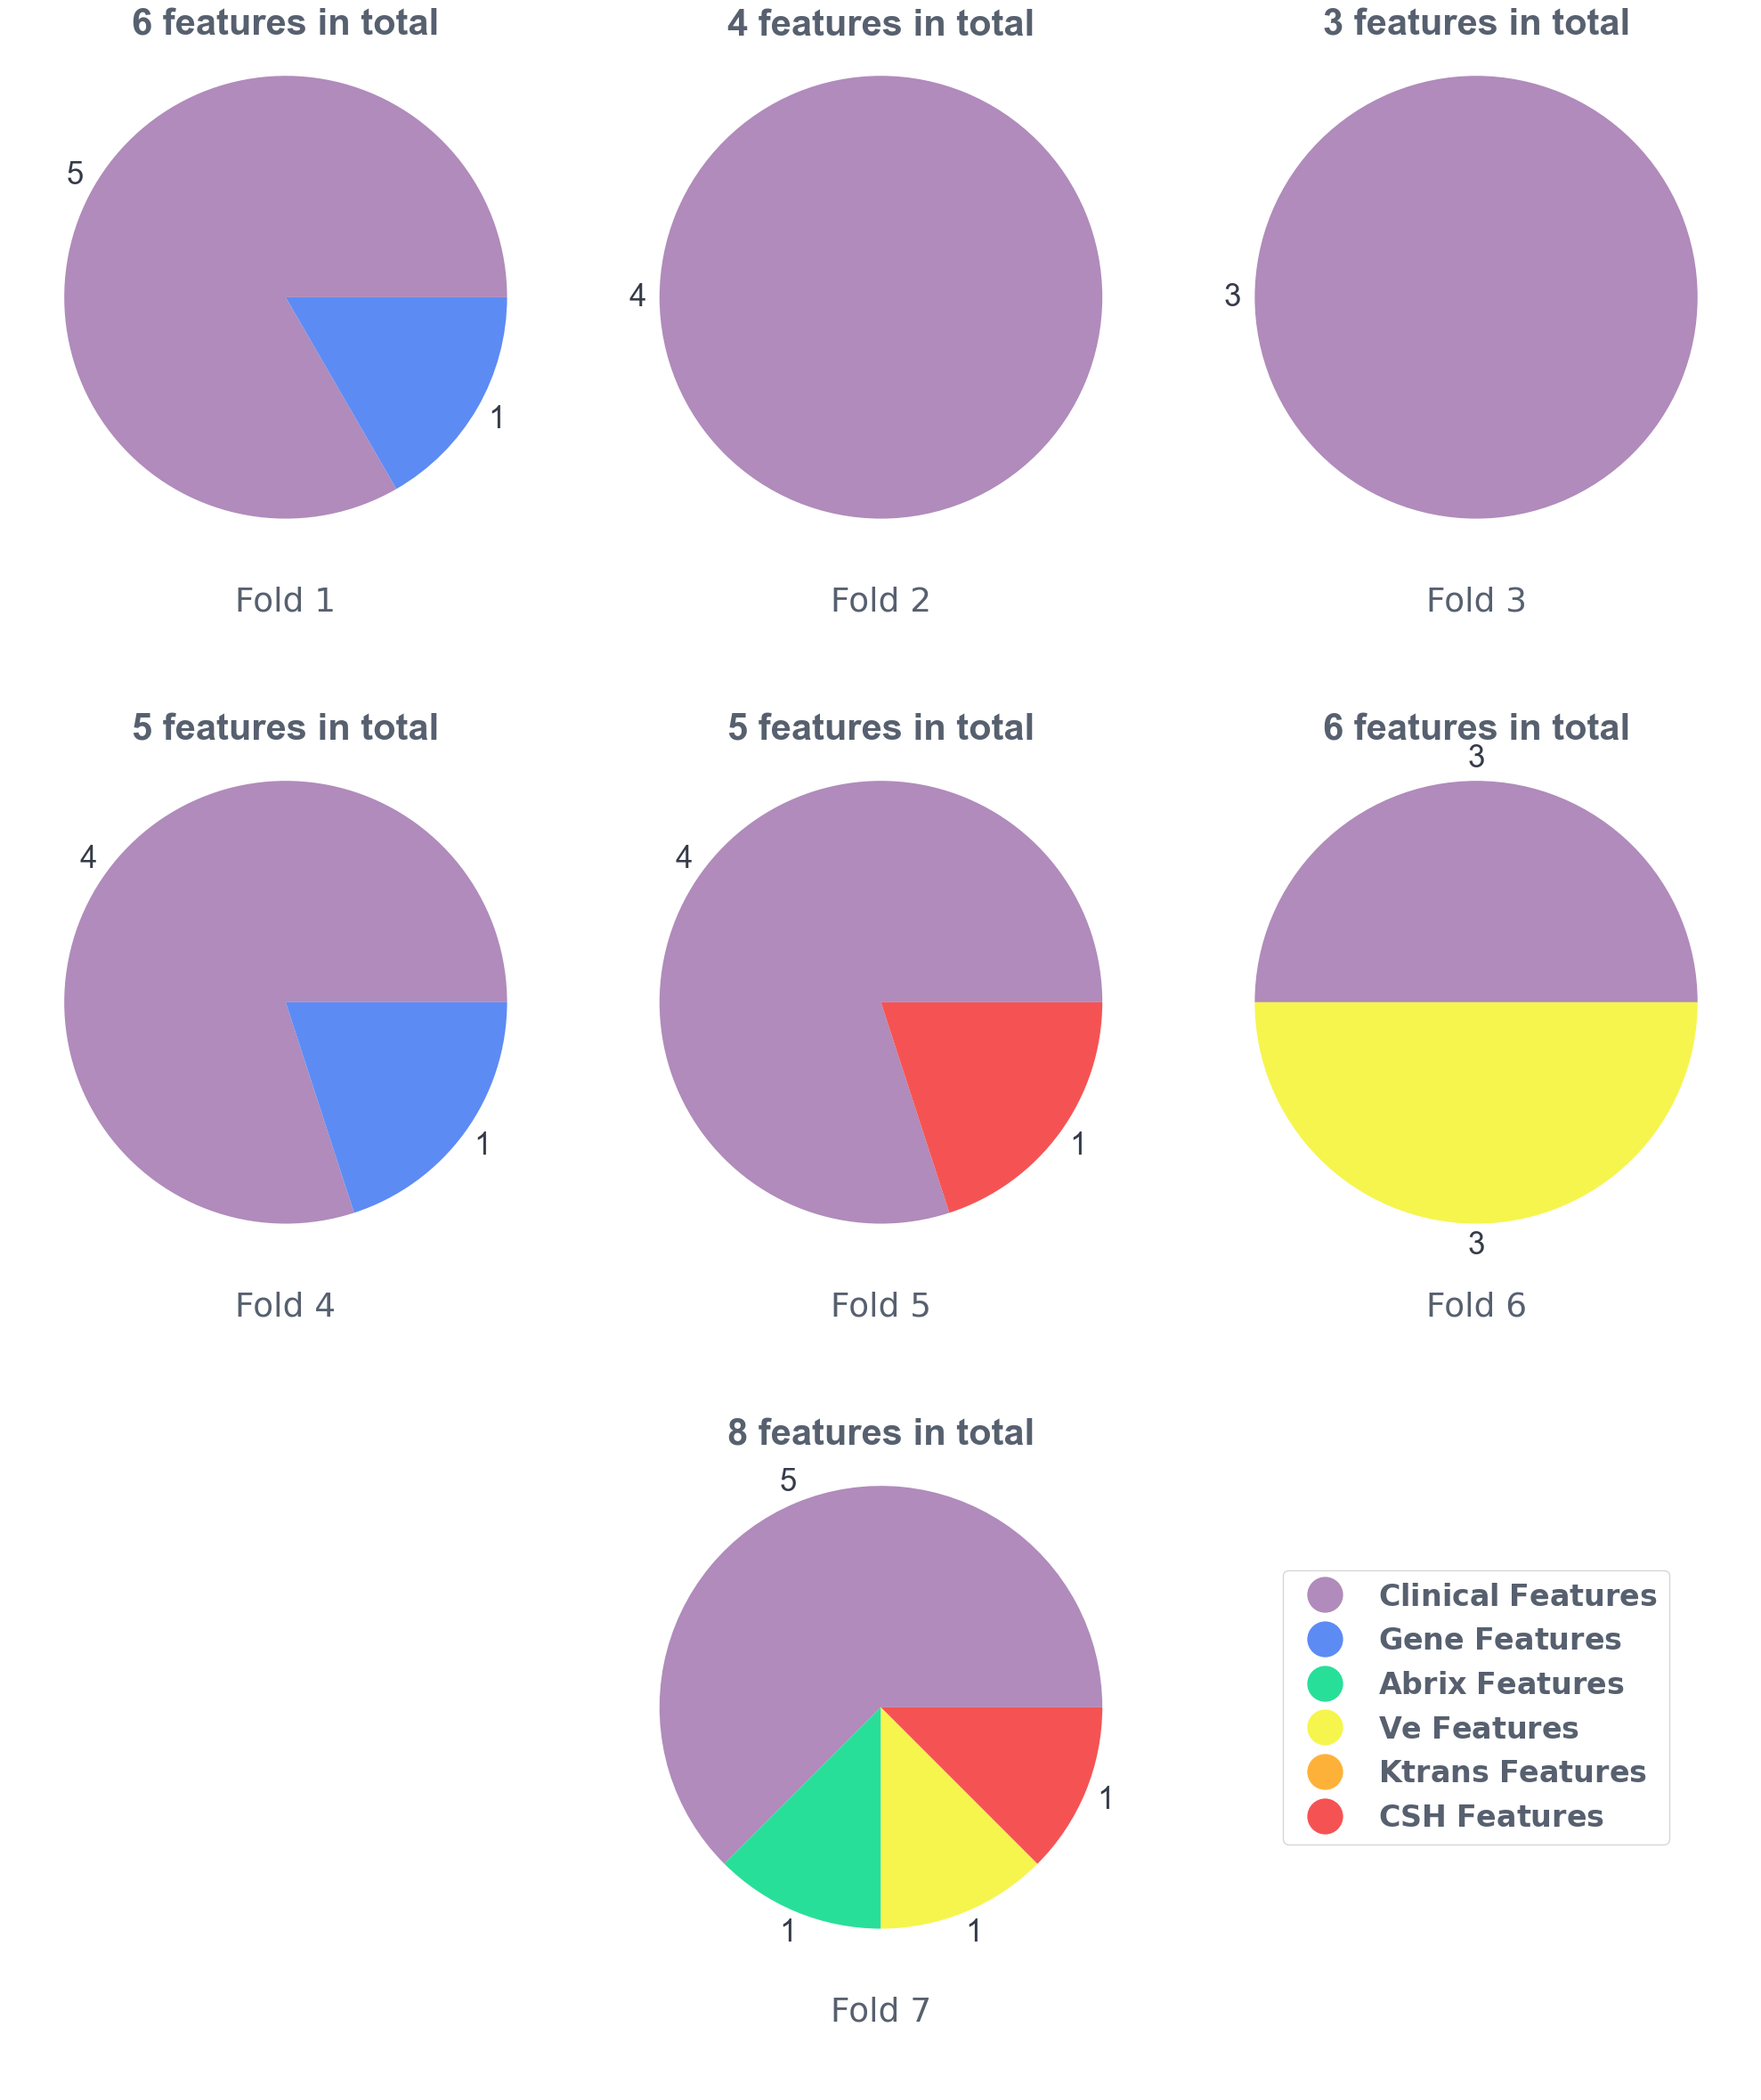

In [45]:
# Iterate through the Acc dictionary to create plots

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

for TAU_value, TAU_data in data.items():

    # Create figure and axes
    fig, ax = plt.subplots(3,3, figsize=(20, 25))

    # To locate the plots in the right place
    numbers = {
        (0,0): 1,
        (0,1): 2,
        (0,2): 3,
        (1,0): 4,
        (1,1): 5,
        (1,2): 6,
        (2,1): 7
    }
    
    # Color Map
    color_dict = {'Clinical_Features':'#B08BBB', 
                  'Gene_Features':'#5D8BF4', 
                  'Abrix_Features':'#28DF99', 
                  'Ve_Features':'#F6F54D', 
                  'Ktrans_Features':'#FEB139', 
                  'CSH_Features':'#F55353'}
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='$\\bf{Clinical\ Features}$', markerfacecolor='#B08BBB', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='$\\bf{Gene\ Features}$', markerfacecolor='#5D8BF4', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='$\\bf{Abrix\ Features}$', markerfacecolor='#28DF99', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='$\\bf{Ve\ Features}$', markerfacecolor='#F6F54D', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='$\\bf{Ktrans\ Features}$', markerfacecolor='#FEB139', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='$\\bf{CSH\ Features}$', markerfacecolor='#F55353', markersize=30)]
    counter = 1
    for i in range(0,3):
        for j in range(0,3):
            if i==2:
                if j==0:
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].set_xticks([])
                    ax[i][j].set_yticks([])
                    continue
                elif j==2:
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].set_xticks([])
                    ax[i][j].set_yticks([])
                    ax[i][j].legend(handles=legend_elements, loc='center', prop={'size': 24}, labelcolor="#57606f")
                    continue
            
            # Label Names
            labels = [key for key,value in TAU_data[f'fold_{counter}'].items() if value!=0]
            
            # Portions
            sizes = [value for value in TAU_data[f'fold_{counter}'].values() if value!=0]
            
            # Colors
            colors = [value for key,value in color_dict.items() if key in labels]
            

            patches, texts, pcts = ax[i][j].pie(sizes, autopct=autopct_format(sizes), pctdistance=1.1, 
                                                labeldistance=0.3, colors=colors, textprops={'family':'Arial', 'size': '15', 'color':'#353b48'})
                                                # labels=labels, rotatelabels=True,
                    
                    
            for pct in pcts:
                pct.set_fontsize(25)
                
            total = sum(sizes)
            ax[i][j].set_title(f"{total} features in total", 
                                   x=0.5, y=0.96, color='#57606f', 
                                   fontdict = {'family':'Arial', 'fontweight':'bold', 'fontsize':'30'})
            ax[i][j].set_xlabel(f'Fold {numbers[(i,j)]}', rotation = 0, labelpad=6, color='#57606f', fontsize=27.0)
            plt.subplots_adjust(hspace=0.0, wspace=0.3)
            plt.tight_layout()
            counter += 1
    # fig.text(0.5, 1.01, f"Datasets' Shares In The Selected RENT Features for \n TAU Value = 0.{TAU_value}", 
    #          ha="center", va="center", rotation=0, color='#57606f', fontsize=30.0)
    plt.savefig(f'PieChart_TAU_0{TAU_value}.png', bbox_inches='tight')
    plt.show()